### Linear regression with linear and Gaussian basis functions

### Name: Deepak Reddy

In [270]:
from numpy import *

In [271]:
data = genfromtxt('airfoil_self_noise.dat')
#data = genfromtxt('yacht_hydrodynamics.data')
#data = genfromtxt('slump_test.data', delimiter=",", skip_header=1)

#shape(data)


Z- score normalization

In [272]:
data_s = zeros(shape(data))
for i in range(shape(data)[1]):
    data_s[:,i] = (data[:,i] - data[:,i].mean())/(data[:,i].std())
    

In [273]:
def my_regression(trainX,testX,noutput):
    x = [0, 0.01, 0.1, 1, 10, 100, 1000]
    test_pred =[]
    for lamda in x:
       # lamda = 0.1
        train_mat= trainX[:,0:shape(trainX)[1]-noutput]
        trainT_mul = lamda*eye(shape(trainX)[1]-noutput)+ matmul(train_mat.transpose(),train_mat)
        trainT_inv = linalg.pinv(trainT_mul)
        final_train = matmul(trainT_inv, train_mat.transpose())
        n_columns = shape(trainX)[1]
        W = matmul(final_train, trainX[:,(n_columns-noutput): ])
        test_pred.append(matmul(testX,W))
    
    return test_pred

Dividing the data in to train and test using k-fold division and as per requirements for "my_regression" function

In [274]:
k = 5         #K fold = 5 fold
noutput = 1   #number of output in data

data_lst = [] #Adding seperate data set of each fold in to list
for i in range(k):
    if i != (k-1):
        data_lst.append(data_s[i*(len(data_s)/k):(i+1)*(len(data_s)/k),:])
    else:
        data_lst.append(data_s[i*(len(data_s)/k):,:])


trainX_lst = [] #Forming the 5 train datasets in to list 
testX_lst =[]   #Forming the 5 test datasets in to list 
for i in range(k):
    data = data_lst[i]
    for j in range(i+1,i+k-1):
        data = concatenate((data, data_lst[j%k]),axis =0)
        
    trainX_lst.append(data)
    testX_lst.append(data_lst[(i+k-1)%k])
    



Performing my_regression for linear basis fuction on each of the K-fold data sets and outputting the average square error over k-fold cross validation

In [275]:
Err = zeros(7)
for i in range(k):
    trainX_data = trainX_lst[i] #selecting the train dataset from the already stored list
    [row,col] = shape(trainX_data)
    trainX = ones((row,col+1))
    #Adding bias to data
    trainX[:,1:] = trainX_data
    
    testX_data = testX_lst[i] #selecting the test dataset from the already stored list
    [row,col] = shape(testX_data)
    testX = ones((row,col+1-noutput))
    testX[:,1:] = testX_data[:,0:shape(testX_data)[1]-noutput]
    testX_output  = testX_data[:,shape(testX_data)[1]-noutput:]
    
    testX_pred =  my_regression(trainX,testX,noutput)
    for m in range(7):
        diff = testX_pred[m] - testX_output
        Err[m] = Err[m]+ sum(diff**2)
    
print(Err/k)
    

[ 173.67295375  173.67242289  173.66765163  173.62057309  173.20955368
  172.8483886   212.99526967]


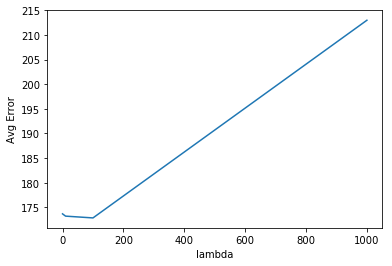

In [276]:
import matplotlib.pyplot as plt
lamda = [0, 0.01, 0.1, 1, 10, 100, 1000]
plt.plot(lamda, Err/k)
plt.ylabel('Avg Error')
plt.xlabel('lambda')
plt.show()


Using Gaussian radial basis function

In [277]:
#defining Radial basis function with input vector and mean as inputs
def RBF(x,u):
    sqdist = sum((x-u)**2)
    return exp(-0.5*sqdist)

Performing my_regression for Gaussian basis fuction on each of the K-fold data sets and outputting the average square error over k-fold cross validation

In [278]:
Err = zeros(7)
k = 5 
noutput = 1
for i in range(k):
    trainX_data = trainX_lst[i]
    trainG_data = trainX_data[:,:-noutput]
    train_data = zeros((shape(trainX_data)[0], 10))
    trainX_output = trainX_data[:,shape(trainX_data)[1]-noutput:]
    
    testX_data = testX_lst[i]
    testG_data = testX_data[:,:-noutput]
    test_data = zeros((shape(testX_data)[0], 10))
    testX_output  = testX_data[:,shape(testX_data)[1]-noutput:]
    
    data = concatenate((trainG_data, testG_data),axis =0)
    #Getting the mean from the data set
    mean = random.randint(0,shape(data)[0], size=10)
    mean_data = data[mean]
    
  #Forming new feature matrix using Gaussian RBF function
    for j in range(10):
        for l in range(shape(trainX_data)[0]):
            train_data[l][j] = RBF(trainG_data[l,:], mean_data[j])
        
        for l in range(shape(testX_data)[0]):
            test_data[l][j] = RBF(testG_data[l,:], mean_data[j])
    
    train_data = hstack((train_data, trainX_output))
    
    testX_pred =  my_regression(train_data,test_data,noutput)
    for m in range(7):
        diff = testX_pred[m] - testX_output
        Err[m] = Err[m]+ sum(diff**2)
    
print(Err/k)
   
        
    

[ 251.53423887  251.52379389  251.42942078  250.55862752  250.07163562
  271.2661261   293.89022913]


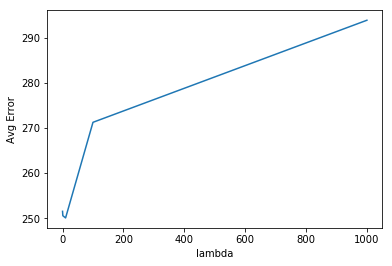

In [279]:
lamda = [0, 0.01, 0.1, 1, 10, 100, 1000]
plt.plot(lamda, Err/k)
plt.ylabel('Avg Error')
plt.xlabel('lambda')
plt.show()